In [19]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [20]:
%cd drive/MyDrive/Github/TP_MACHINE_LEARNING/

/content/drive/MyDrive/Github/TP_MACHINE_LEARNING


# DATA PREPARATION

LEARN, TEST AND EVALUATION DATA

SPLITTING EXAMPLE: IRIS DATA SET

In [1]:
#Chargement des données d'iris
import numpy as np
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
#affichage des etiquettes d'iris
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
#extraction puis permutation aléatoire des indices de 1...len(iris.data)
indices = np.random.permutation(len(iris.data))
indices

array([138, 143,  63, 122,  44, 130, 119, 123,  42, 137, 108,  75,  71,
        21, 141,  95,  41,  12,  83,  10,  38,   9, 121,  30,  33,  55,
       102,  16,  97,  22,  11,  88,  57,  91, 120, 118,  73,  40,  85,
       126, 111,  86,  96,  50,  14,  82,  64, 136,   2, 134, 112,  84,
        49, 116,  43, 147,  36,  65,  31, 140,  77,  48, 142, 113, 139,
       110,   1,   3,  74, 114, 101, 133, 132, 117,   4, 109,  98,  60,
        72,  15,  94,  66,  32,  45,  13, 128,   0,  87,  61,  70, 135,
        23,  67,  51,  93,  62,  25,  18,  54,  47, 131, 124,  39, 107,
        34, 129,  26, 104,  92,  80,  69,  28,  68, 100, 127, 115,  19,
        52,  37,  78, 103,  46,  56,  27,  89,  58,  59,   8, 146,  79,
         6, 144, 125, 145,  20,   5, 106, 105,  90,   7,  99,  53, 148,
        24,  35,  81,  17,  76, 149,  29])

In [4]:
# Selection données dans suivant l'ordre de la liste 'indices' en enlevant les douze derniers 
# Puis stockage dans le jeux d'apprentissage
n_test_samples = 12
learnset_data = iris.data[indices[:-n_test_samples]]
learnset_labels = iris.target[indices[:-n_test_samples]]

# Selection des douzes elements restants
testset_data = iris.data[indices[-n_test_samples:]]
testset_labels = iris.target[indices[-n_test_samples:]]
print(learnset_data[:4], learnset_labels[:4])
print(testset_data[:4], testset_labels[:4])


[[6.  3.  4.8 1.8]
 [6.8 3.2 5.9 2.3]
 [6.1 2.9 4.7 1.4]
 [7.7 2.8 6.7 2. ]] [2 2 1 2]
[[5.5 2.6 4.4 1.2]
 [5.  3.4 1.5 0.2]
 [5.7 2.8 4.1 1.3]
 [5.5 2.3 4.  1.3]] [1 0 1 1]


Les deux cellules precedantes font une extraction aléatoire de 12 éléments dans le jeu de test et mettent le reste dans le jeux d'apprentissage.

SPLITS WITH SKLEARN

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#Chargement d'iris et stockage des descripteurs et étiquettes dans les deux variables data et labels
iris = load_iris()
data, labels = iris.data, iris.target

#Extraction du jeu d'apprentissage et de test avec 80% pour l'apprentissage et 20% pour le test
res = train_test_split(data, labels,train_size=0.8,test_size=0.2,random_state=42)
train_data, test_data, train_labels, test_labels = res
n = 7

#Affichage des 7 premier du jeu d'apprentissage et des 7 premiers du jeu de test
print(f"The first {n} data sets:")
print(test_data[:7])
print(f"The corresponding {n} labels:")
print(test_labels[:7])


The first 7 data sets:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]]
The corresponding 7 labels:
[1 0 2 1 1 0 1]


STRATIFIED RANDOM SAMPLE

In [6]:
import numpy as np
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels))* 100.0)



All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 34.16666667 32.5       ]
Test: [33.33333333 30.         36.66666667]


In [7]:
#Chargement et extraction des données d'iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
data, labels = iris.data, iris.target
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42,
                       stratify=labels)
train_data, test_data, train_labels, test_labels = res

#Affichage du pourcentage de chaque classe (parmis les etiquettes) dans le jeu d'apprentissage de celui de test
print('All:', np.bincount(labels) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels) / float(len(test_labels))* 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


In [40]:
#Chargement de données à partir d'un fichier .txt
# Le fichier 'data/strange_flowers.txt' est créer dans la section : # GENERATE DATASETS IN PYTHON
content = np.loadtxt("data/strange_flowers.txt", delimiter=" ")
data = content[:, :-1]
# cut of the target column
labels = content[:, -1]
labels.dtype
labels.shape

(795,)

In [9]:
# type des objets dans le tableau numpy labels
print(labels.dtype)
# taille de ce tableau numpy
print(labels.shape)

int64
(150,)


In [10]:
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42,
                       stratify=labels)
train_data, test_data, train_labels, test_labels = res
# np.bincount expects non negative integers:
print('All:', np.bincount(labels.astype(int)) / float(len(labels)) * 100.0)
print('Training:', np.bincount(train_labels.astype(int)) / float(len(train_labels)) * 100.0)
print('Test:', np.bincount(test_labels.astype(int)) / float(len(test_labels)) * 100.0)

All: [33.33333333 33.33333333 33.33333333]
Training: [33.33333333 33.33333333 33.33333333]
Test: [33.33333333 33.33333333 33.33333333]


In [11]:
labels.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# GENERATE DATASETS IN PYTHON

In [12]:
import numpy as np
import pandas as pd

# Generation d'un dataframe dont les exemples sont les pays (dans 'cities')
# Et les caracteristiques sont : Temperature, Humidity et Wind
cities = ['Berlin', 'Frankfurt', 'Hamburg',
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Freiburg', 'Karlsruhe']
n= len(cities)

# np.random.normal(c, s, n) : génere une liste de valeurs dont la distribution a
# pour centre c, pour ecart type s et pour taille n 
data = {'Temperature': np.random.normal(24, 3, n),
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)
       }
df = pd.DataFrame(data=data, index=cities)
df
          

,Temperature,Humidity,Wind
Berlin,23.474837,79.014470,12.785059
Frankfurt,21.496436,77.994426,12.963207
Hamburg,22.958106,80.880537,13.529696
Nuremberg,21.121055,74.159612,12.405813
Munich,16.509262,77.449356,18.764072
Stuttgart,23.250460,74.784035,9.736140
Hanover,25.093156,78.445936,17.652377
Saarbruecken,21.780058,79.268980,18.088291
Cologne,25.323959,73.666406,13.540213
Constance,23.392478,77.787740,15.616464


ANOTHER EXAMPLE

We will create artificial data for four nonexistent types of flowers:

• Flos Pythonem

• Flos Java

• Flos Margarita

• Flos artificialis

The RGB avarage colors values are correspondingly:
• (255, 0, 0)

• (245, 107, 0)

• (206, 99, 1)

• (255, 254, 101)

The avarage diameter of the calyx is:

• 3.8

• 3.3

• 4.1

• 2.9

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import truncnorm

#La fonction truncnorm 


def truncated_normal(mean=0, sd=1, low=0, upp=10, type=int):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)

# number of items for each flower class:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}

# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                               num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
                              num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
                                    num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                               num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
                              num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
                                    num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
                             num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
                               num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
                              num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
                                    num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
                             num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
                               num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112, 
                              num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
                                    num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data
data = np.concatenate((flowers["flos_pythonem"],
                       flowers["flos_java"],
                       flowers["flos_margarita"],
                       flowers["flos_artificialis"]),
                      axis=0)

# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num

conc_data = np.concatenate((data, target.reshape(target.shape[0],1)),axis=1)
np.savetxt("data/strange_flowers.txt", conc_data, fmt="%2.2f",)


bin	 datalab  home	 lib64	opt	    root  srv		     tmp    var
boot	 dev	  lib	 media	proc	    run   sys		     tools
content  etc	  lib32  mnt	python-apt  sbin  tensorflow-1.15.2  usr


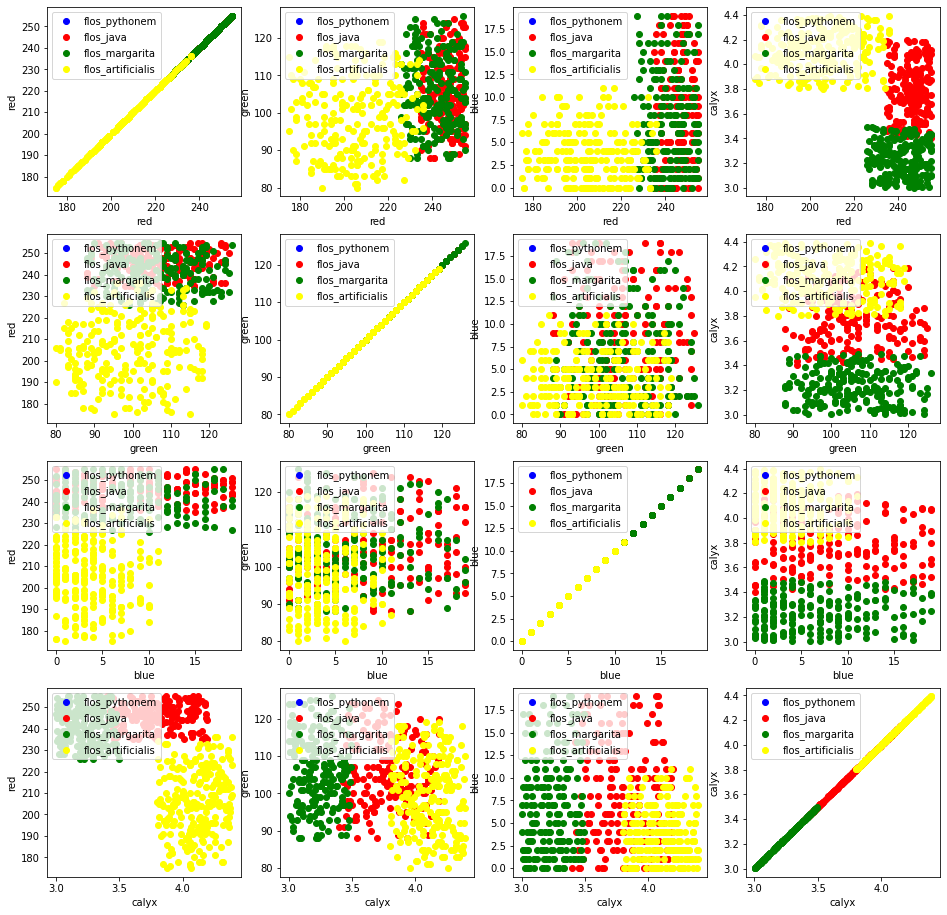

In [22]:
import matplotlib.pyplot as plt

target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))
colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(len(target_names)):
            ax[x, y].scatter(data[target==color_ind, x],
                             data[target==color_ind, y],
                             label=target_names[color_ind],
                             c=colors[color_ind])
            ax[x, y].set_xlabel(xname)
            ax[x, y].set_ylabel(yname)
            ax[x, y].legend(loc='upper left')
plt.show()

# GENERATE SYNTHETIC DATA WITH SCIKIT-LEARN

In [23]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
data, labels = make_blobs(n_samples=1000,
                          #centers=n_classes,
                          centers=np.array([[2, 3], [4, 5], [7,9]]),
                          random_state=1)

labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:10]
np.savetxt("squirrels.txt", all_data)
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [24]:
import numpy as np

a = np.array( [[1, 2], [3, 4]])
b = np.array( [5, 6])
b = b.reshape((b.shape[0], 1))
print(b)
x = np.concatenate( (a, b), axis=1)
x

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

# READING THE DATA AND CONVERSION BACK INTO 'DATA' AND 'LABELS'

In [25]:
file_data = np.loadtxt("squirrels.txt")
data = file_data[:,:-1]
labels = file_data[:,2:]
labels = labels.reshape((labels.shape[0]))

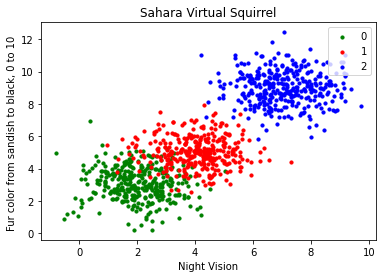

In [26]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3
fig, ax = plt.subplots()

for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], 
               data[labels==n_class,1],
               c=colours[n_class], s=10, label=str(n_class))

ax.set(xlabel='Night Vision',
       ylabel='Fur color from sandish to black, 0 to 10 ',
       title='Sahara Virtual Squirrel')

ax.legend(loc='upper right')

In [27]:
from sklearn.model_selection import train_test_split

data_sets = train_test_split(data, 
                             labels, 
                             train_size=0.8, 
                             test_size=0.2,
                             random_state=42 # garantees same output for every run
                            )
train_data, test_data, train_labels, test_labels = data_sets

In [28]:
# import model
from sklearn.neighbors import KNeighborsClassifier

# create classifier
knn = KNeighborsClassifier(n_neighbors=8)

# train
knn.fit(train_data, train_labels)

# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels


array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [30]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))


Accuracy: 0.97


# OTHER INTERESTING DISTRIBUTIONS

In [31]:
import numpy as np
import sklearn.datasets as ds

data, labels = ds.make_moons(n_samples=150,
                             shuffle=True,
                             noise=0.19,
                             random_state=None)
data += np.array(-np.ndarray.min(data[:,0]),-np.ndarray.min(data[:,1]))
np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.38135714571374313)

[Text(0, 0.5, 'Y'), Text(0.5, 0, 'X'), Text(0.5, 1.0, 'Moons')]

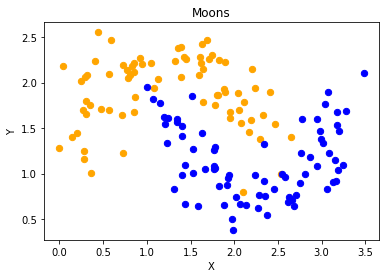

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],c='blue', s=40, label='blues')
ax.set(xlabel='X', ylabel='Y', title='Moons')


In [33]:
min_x_new, max_x_new = 33, 88
min_y_new, max_y_new = 12, 20
data, labels = ds.make_moons(n_samples=100, 
                             shuffle=True,
                             noise=0.05,
                             random_state=None)
min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])

#data -= np.array([min_x, 0])
#data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), 1])
#data += np.array([min_x_new, 0])
#data -= np.array([0, min_y])
#data *= np.array([1, (max_y_new - min_y_new) / (max_y - min_y)])
#data += np.array([0, min_y_new])

data -= np.array([min_x, min_y])
data *= np.array([(max_x_new - min_x_new) / (max_x - min_x), (max_y_new- min_y_new) / (max_y - min_y)])
data += np.array([min_x_new, min_y_new])

#np.ndarray.min(data[:,0]), np.ndarray.max(data[:,0])
data[:6]

array([[82.71088852, 13.32937642],
       [85.21126886, 15.23369363],
       [42.40513829, 18.92666833],
       [54.25428423, 14.35651475],
       [87.22189523, 16.23385668],
       [77.61056341, 12.63054296]])

In [34]:

def scale_data(data, new_limits, inplace=False ):
    if not inplace:
        data = data.copy()
    min_x, min_y = np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])
    max_x, max_y = np.ndarray.max(data[:,0]), np.ndarray.max(data[:,1])
    min_x_new, max_x_new = new_limits[0]
    min_y_new, max_y_new = new_limits[1]
    data -= np.array([min_x, min_y])
    data *= np.array([(max_x_new - min_x_new) / (max_x - min_x),
                      (max_y_new - min_y_new) / (max_y - min_y)])
    data += np.array([min_x_new, min_y_new])
    if inplace:
        return None
    else:
        return data

data, labels = ds.make_moons(n_samples=100,
                             shuffle=True,
                             noise=0.05,
                             random_state=None)
scale_data(data, [(1, 4), (3, 8)], inplace=True)


In [35]:
data[:10]

array([[3.91943545, 6.34747711],
       [2.41653605, 3.86347811],
       [3.93385799, 5.03230024],
       [2.98039533, 4.6594069 ],
       [3.65848726, 3.87027737],
       [2.98337249, 4.8575677 ],
       [2.72362452, 6.77809876],
       [1.32334799, 7.07131815],
       [2.79520613, 6.65725348],
       [1.12016031, 5.30404385]])

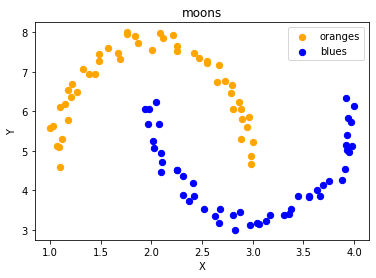

In [36]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
           c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
           c='blue', s=40, label='blues')
ax.set(xlabel='X',
       ylabel='Y',
       title='moons')
ax.legend(loc='upper right');


In [37]:
import sklearn.datasets as ds

data, labels = ds.make_circles(n_samples=100,
                               shuffle=True,
                               noise=0.05,
                               random_state=None)


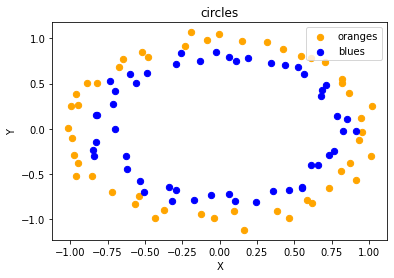

In [38]:
fig, ax = plt.subplots()
ax.scatter(data[labels==0, 0], data[labels==0, 1],
           c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1],
           c='blue', s=40, label='blues')
ax.set(xlabel='X',
       ylabel='Y',
       title='circles')
ax.legend(loc='upper right')


Automatically created module for IPython interactive environment


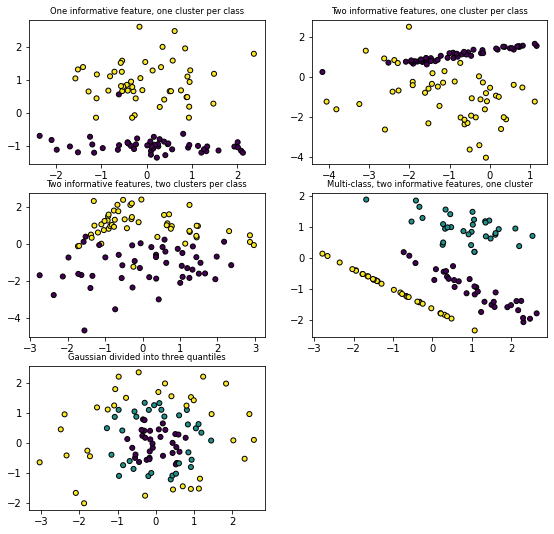

In [39]:
print(__doc__)
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

plt.figure(figsize=(8, 8))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)
plt.subplot(321)
plt.title("One informative feature, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.subplot(322)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.subplot(323)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')
plt.subplot(324)
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small')
X1, Y1 = make_classification(n_features=2,
                             n_redundant=0,
                             n_informative=2,
                             n_clusters_per_class=1,
                             n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
plt.subplot(325)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')
plt.show()
